# Data Science 101 - Guided Practice

Dr J Rogel-Salazar

[j.rogel.datascience@gmail.com](mailto:j.rogel.datascience@gmail.com)

Imagine that after you are working as a sales analyst for a brand with presence in the US.

You are asked to look at regional sales data from your vendors and you want to use your newly acquired Python skills...

For this guided practice we will create some fake data related to the average income and population of some cities in the US. 

We will apply the python knowledge we have acquired and see how some popular modules such as pandas, numpy and matplotlib are used.

We can use the Jupyter interface to invoke functionality from the terminal.

For example, we can list the files under the current directory as follows:

In [ ]:
!ls

# Importing packages and modules

Let us start by importing packages and modules that will be used in this practice.

We will make use of a functions to calculate the average. This is included in the NumPy module.

Also we will use pandas to manipulate data organised in a table format. We call this a *dataframe*.

In [1]:
import numpy as np
import pandas as pd

We will also import a functionality to emable us to show plots in the notebook.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The code above specifies that figures should be shown `inline`, directly in the notebook. This is not available with the standard IPython interpreter.

We need to `import` all these libraries at the beginning of the notebook so that they are ready to be used later on. 

Remember our discussion about algorithms? The logical order of the steps we use to complete a task is important!

Let us define some lists that can be used to create a pandas dataframe. Let us start by listing the different cities we are interested in:


In [3]:
cities  = pd.Series(['Atlanta','Lilburn','Athens',
                     'Auburn','Augusta','NYC','Buffalo','Albany',
                     'Miami','Tallahassee'])

Now the states where these cities are:

In [4]:
states = pd.Series(['GA','GA','GA','GA','GA',
                    "NY","NY","NY","FL","FL"])

Let us now list the average income and population for the cities in question:

In [5]:
city_avg_incomes = pd.Series([55000,40000,50000,45000,
                              30000,60000,57000,56000,65000,40000])

city_populations = pd.Series([5000000,250000,100000,
                              50000, 200000,6000000,3000000,400000,
                              4000000,5000000])

<div class="alert alert-block alert-info"><h3>Question</h3></div>
Have you noticed that we are using lists to create the series expected by pandas?


# Pandas dataframe

We are now ready to put all the information above in a single dataframe:


In [6]:
city_table = pd.DataFrame( {'cities': cities,  
             'states': states,
             'city_avg_incomes':city_avg_incomes,
             'city_populations':city_populations
              } )

<div class="alert alert-block alert-info"><h3>Question</h3></div>


Do you remember what is the syntax to define a dictionary in Python?

# Looking at the Dataframe

Let us take a look at the first 6 entries:

In [7]:
city_table.head()

,cities,city_avg_incomes,city_populations,states
0,Atlanta,55000,5000000,GA
1,Lilburn,40000,250000,GA
2,Athens,50000,100000,GA
3,Auburn,45000,50000,GA
4,Augusta,30000,200000,GA


# Manipulating the data 

We can create a column to state the population in millions and another one for the income in thousands. 

Let us define a function that formats a number in terms of millions

<div class="alert alert-block alert-info"><h3>Question</h3></div>


Do you remember how to define a function in Python?

In [8]:
def FormatMillions(x):
    return x/1000000.0

We can now "apply" this function to one of the columns of our dataframe to create a new column:

In [9]:
city_table['pop_in_millions'] = city_table['city_populations'].apply(FormatMillions)

Let us do something similar for the incomes, but format the numbers in terms of thousands. 

In [10]:
def FormatThousands(x):
    return x/1000.0

In [11]:
city_table['income_in_k'] =city_table['city_avg_incomes'].apply(FormatThousands)

Let us see the result:

In [12]:
city_table.head()

,cities,city_avg_incomes,city_populations,states,pop_in_millions,income_in_k
0,Atlanta,55000,5000000,GA,5.00,55.0
1,Lilburn,40000,250000,GA,0.25,40.0
2,Athens,50000,100000,GA,0.10,50.0
3,Auburn,45000,50000,GA,0.05,45.0
4,Augusta,30000,200000,GA,0.20,30.0


<div class="alert alert-block alert-info"><h3>Question</h3></div>

Why do you think are the functions above useful for?

# Data undestanding

How many columns and rows do we have in the dataframe?

In [13]:
city_table.shape

(10, 6)

We have 10 records (rows) and 6 fields (columns)

Let us select some of the data points. For instance the first 4 entreos for population and income.

In [14]:
city_table[0:4][["pop_in_millions",'income_in_k']]

,pop_in_millions,income_in_k
0,5.00,55.0
1,0.25,40.0
2,0.10,50.0
3,0.05,45.0


We can select some data based on conditionals. For instance let us show only those records where the income is greater than 30l.

In [15]:
city_table[(city_table['income_in_k']<=30)]

,cities,city_avg_incomes,city_populations,states,pop_in_millions,income_in_k
4,Augusta,30000,200000,GA,0.2,30.0


As we can see, only Augusta meets the condition.

We can order the data. Let us order the dataframe in descending order by the population in millions.

In [16]:
city_table.sort_values('pop_in_millions', ascending=0)

,cities,city_avg_incomes,city_populations,states,pop_in_millions,income_in_k
5,NYC,60000,6000000,NY,6.00,60.0
0,Atlanta,55000,5000000,GA,5.00,55.0
9,Tallahassee,40000,5000000,FL,5.00,40.0
8,Miami,65000,4000000,FL,4.00,65.0
6,Buffalo,57000,3000000,NY,3.00,57.0
7,Albany,56000,400000,NY,0.40,56.0
1,Lilburn,40000,250000,GA,0.25,40.0
4,Augusta,30000,200000,GA,0.20,30.0
2,Athens,50000,100000,GA,0.10,50.0
3,Auburn,45000,50000,GA,0.05,45.0


Finally, let us get a description of each of the numeric fields in the dataframe. We will be able to see the following statistics:

- count of records
- mean
- standard deviation
- minimum and maximum values
- percentiles

In [17]:
city_table.describe()

,city_avg_incomes,city_populations,pop_in_millions,income_in_k
count,10.00000,1.000000e+01,10.000000,10.000000
mean,49800.00000,2.400000e+06,2.400000,49.800000
std,10850.49922,2.442107e+06,2.442107,10.850499
min,30000.00000,5.000000e+04,0.050000,30.000000
25%,41250.00000,2.125000e+05,0.212500,41.250000
50%,52500.00000,1.700000e+06,1.700000,52.500000
75%,56750.00000,4.750000e+06,4.750000,56.750000
max,65000.00000,6.000000e+06,6.000000,65.000000


# Grouping Data

We have cities from three States and thus we may be interested in looking at the average per State.

The first thing to do is group the data by state:

In [18]:
cty_table_by_state = city_table.groupby('states') 

We can now define a function to calculate the mean:

In [19]:
def my_mean(x):
    return x.mean()

Let us apply the function to the groupped dataframe to obtain the average city income by State:

In [20]:
avg_city_income_by_state = cty_table_by_state['income_in_k'].apply(my_mean)

In [21]:
avg_city_income_by_state

states
FL    52.500000
GA    44.000000
NY    57.666667
Name: income_in_k, dtype: float64

What is happening here?

Since the dataframe has been groupped by State, the function `my_mean` is applied to each individual group, giving us the average for each State, all in one line of code!

We can do the same to obtain the average city population by State:

In [22]:
avg_city_pop_by_state  = cty_table_by_state['pop_in_millions'].apply(my_mean)

In [23]:
avg_city_pop_by_state

states
FL    4.500000
GA    1.120000
NY    3.133333
Name: pop_in_millions, dtype: float64

Finally, let us see the descriptive stats for each State. We can do this with the `describe` method.

In [24]:
cty_table_by_state.describe()

city_avg_incomes                                                \
                  count          mean           std      min      25%   
states                                                                  
FL                  2.0  52500.000000  17677.669530  40000.0  46250.0   
GA                  5.0  44000.000000   9617.692031  30000.0  40000.0   
NY                  3.0  57666.666667   2081.665999  56000.0  56500.0   

                                  city_populations               ...   \
            50%      75%      max            count          mean ...    
states                                                           ...    
FL      52500.0  58750.0  65000.0              2.0  4.500000e+06 ...    
GA      45000.0  50000.0  55000.0              5.0  1.120000e+06 ...    
NY      57000.0  58500.0  60000.0              3.0  3.133333e+06 ...    

       income_in_k       pop_in_millions                                       \
               75%   max           count      mean       std   min   25%  50%   
states                                                                          
FL           58.75  65.0             2.0  4.500000  0.707107  4.00  4.25  4.5   
GA           50.00  55.0             5.0  1.120000  2.170426  0.05  0.10  0.2   
NY           58.50  60.0             3.0  3.133333  2.802380  0.40  1.70  3.0   

                   
         75%  max  
states             
FL      4.75  5.0  
GA      0.25  5.0  
NY      4.50  6.0  

[3 rows x 32 columns]

# Visualising data

<div class="alert alert-block alert-info"><h3>Question</h3></div>

What do you think this is important for?

<div class="alert alert-block alert-info"><h3>Question</h3></div>

From the discussion about Python libraries, what library may be useful here?

Let us also import the matplotlib library:

We can display the plots in the notebook with the following command:
    

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Remember where you have seen this before?

`pylab` is part of `matplotlib` and it provides us with a MATLAB like environment. 

`matplotlib` is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits 

matplotlib has a number of dependencies, among them `numpy` which it imports under the common alias `np`.

In [26]:
import matplotlib.pyplot as plt

In [38]:
city_table['cities'].shape[0]

10

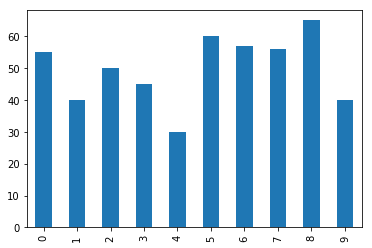

In [48]:
city_table['income_in_k'].plot(kind='bar');

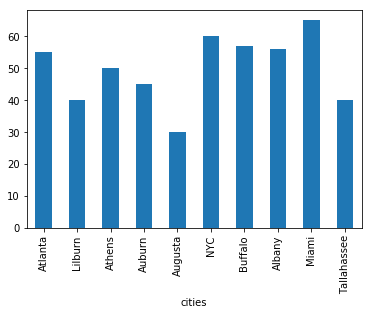

In [49]:
city_table.set_index('cities')['income_in_k'].plot(kind='bar');

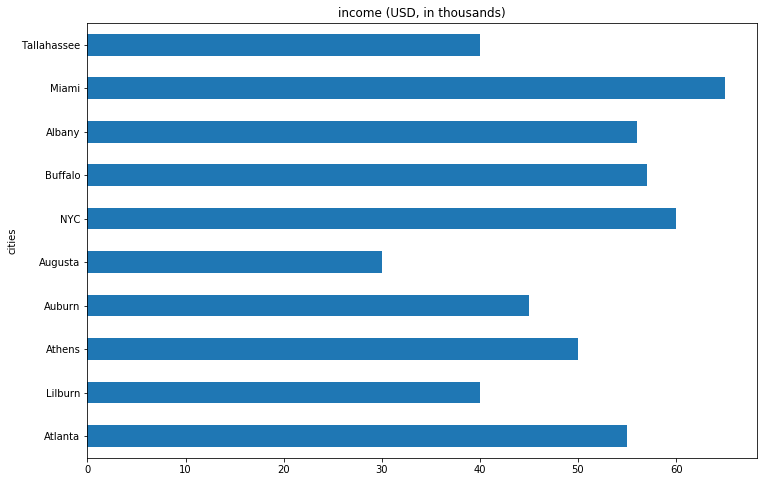

In [51]:
plt.subplots(figsize=(12,8))
city_table.set_index('cities')['income_in_k'].plot(kind='barh')
plt.title('income (USD, in thousands)');